<h1>Mahima Khanna</h1><h2>Exploratory Data Anlaysis - Sports </h2>
   <h2> Task1</h2>
    <p>Perform 'Exploratory Data Analysis' on the dataset 'Indian Premier League'.</p>
<p>As a sports analyst, find out the most successful teams, players and factors
contributing win or loss of a team.</p>
    
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2>Reading the dataset</h2>

In [2]:
df1 = pd.read_csv('matches.csv')
df2 = pd.read_csv('deliveries.csv')

In [3]:
df1.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


<h2>Total wins by each team</h2>

In [5]:
df1['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

<h2>Maximum winning team</h2>

<AxesSubplot:xlabel='winner'>

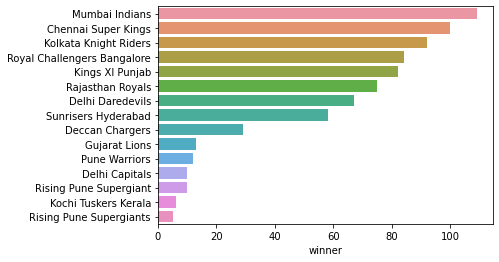

In [6]:
data =df1.winner.value_counts()
sns.barplot(x=data,y=data.index)

In [7]:
 df1['winner'].value_counts().max()

109

<h3>Team won by max run</h3>

In [8]:
df1.iloc[df1['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [9]:
df1.iloc[df1['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

<h3>Team won by max wickets</h3>

In [10]:
df1.iloc[df1['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

<h3>Top players in IPL</h3>

In [12]:
df1['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
PD Collingwood     1
LR Shukla          1
SW Billings        1
CRD Fernando       1
WPUJC Vaas         1
Name: player_of_match, Length: 226, dtype: int64

In [13]:
df1['player_of_match'].value_counts().max()

21

Text(0.5, 1.0, 'Top Players in the IPL')

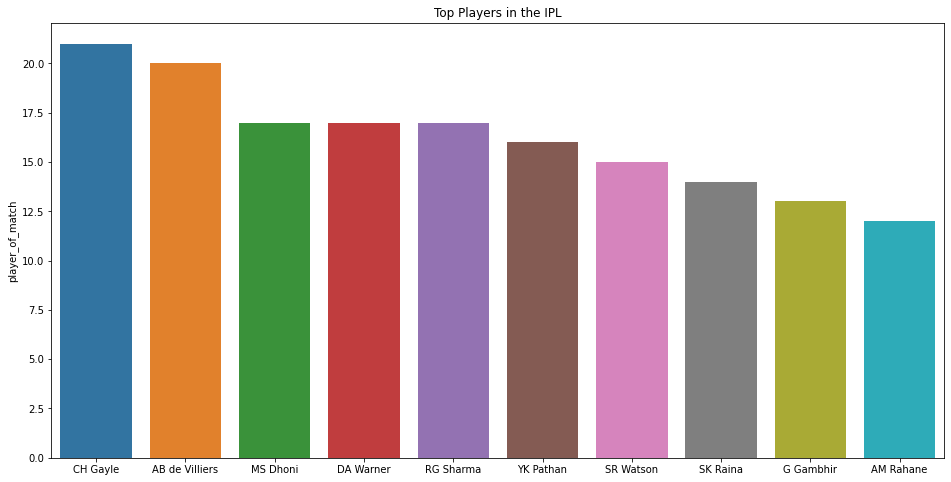

In [14]:
plt.figure(figsize = (16,8))
x = df1.player_of_match.value_counts()[:10].index
y = df1.player_of_match.value_counts()[:10]
sns.barplot(x, y).set_title('Top Players in the IPL')

In [15]:
x=df1.toss_winner.astype('category').cat.codes
y=df1.winner.astype('category').cat.codes
z=df1.toss_decision.astype('category').cat.codes

<h2> Correlation between the Toss winner and Match winner</h2>


In [16]:
np.corrcoef(x,y)

array([[1.       , 0.4765378],
       [0.4765378, 1.       ]])

<h2> Correlation between the Toss decision and Match winning</h2>

In [17]:
np.corrcoef(z,y)

array([[1.        , 0.06915663],
       [0.06915663, 1.        ]])

<h2>Toss-winning committing win or loss of the match</h2>

In [18]:
match = df1['toss_winner'] == df1['winner']
match.groupby(match).size()

False    363
True     393
dtype: int64

<AxesSubplot:ylabel='count'>

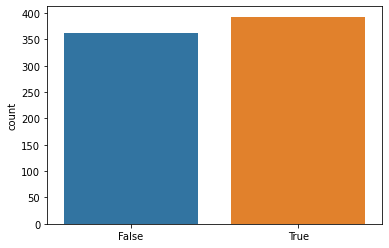

In [19]:
sns.countplot(x=match)

<h2>Toss-decision committing win or loss of the match</h2>


In [20]:
toss = df1.toss_decision.value_counts()
toss

field    463
bat      293
Name: toss_decision, dtype: int64

([<matplotlib.patches.Wedge at 0x1d4809a7cf8>,
 [Text(-0.3805142883934777, 1.032089567977705, 'field'),
  Text(0.3805142883934778, -1.032089567977705, 'bat')],
 [Text(-0.20755324821462415, 0.5629579461696571, '61.2%'),
  Text(0.20755324821462423, -0.5629579461696571, '38.8%')])

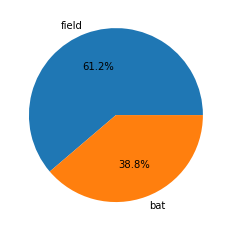

In [21]:
plt.pie(x=toss.values,labels = toss.index,autopct='%1.1f%%')

<h2>Season wise winner</h2>

In [22]:
season_winner = df1.drop_duplicates(subset = ['season'], keep = 'last')
season_winner[['season', 'winner']].reset_index(drop = True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


<h2>Counting number of Fours (Team Wise)</h2>


In [23]:
four =df2[df2.total_runs==4]

four.groupby('batting_team')['total_runs'].agg([('runs by fours','sum'),('four', 'count')])

,runs by fours,four
batting_team,,
Chennai Super Kings,8860,2215
Deccan Chargers,3864,966
Delhi Capitals,952,238
Delhi Daredevils,8716,2179
Gujarat Lions,1840,460
Kings XI Punjab,9968,2492
Kochi Tuskers Kerala,688,172
Kolkata Knight Riders,9860,2465
Mumbai Indians,10452,2613


<h2>Counting number of sixes (Team Wise)</h2>

In [24]:
six =df2[df2.total_runs==6]

six.groupby('batting_team')['total_runs'].agg([('runs by sixes','sum'),('six', 'count')])

,runs by sixes,six
batting_team,,
Chennai Super Kings,5832,972
Deccan Chargers,2382,397
Delhi Capitals,528,88
Delhi Daredevils,4788,798
Gujarat Lions,930,155
Kings XI Punjab,5844,974
Kochi Tuskers Kerala,306,51
Kolkata Knight Riders,5586,931
Mumbai Indians,6564,1094


<h2>Maximum wickets taking player</h2>

In [25]:
wickets = df2.dropna(subset = ['dismissal_kind'])
wickes = wickets[~wickets['dismissal_kind'].isin(['run_out','retired hurt','obstructing the field'])]

wickets.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count', ascending = False).reset_index(drop = True).iloc[:10,:]

,bowler,count
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127


<h2>Top 10 batsmen</h2?

In [26]:
batsman= df2.groupby('batsman')['total_runs'].agg(['sum']).reset_index().sort_values('sum',ascending = False).reset_index(drop = True)
batsman = batsman.rename(columns = {'sum': 'total_runs'})
print('Top 10 Leading Run Scores in IPL')
batsman.iloc[:10,:]

Top 10 Leading Run Scores in IPL


,batsman,total_runs
0,SK Raina,5651
1,V Kohli,5616
2,RG Sharma,5057
3,DA Warner,4975
4,S Dhawan,4876
5,CH Gayle,4873
6,RV Uthappa,4703
7,MS Dhoni,4691
8,AB de Villiers,4583
9,G Gambhir,4485


<h2>Conclusion</h2>
<h6>1.Mumbai Indians has won maximum number of times.</h6>
<h6>2.Kokata Knight Riders has won by maximum wickets.</h6>
<h6>3.CH Gayle and AB de Villiers are the top players of ipl.</h6>
<h6>4.Toss winning and toss decision are factors contributing in winning the match.</h6>
<h6>5.Winning toss team choose to feild first.</h6>
<h6>6.Opting to field in the first innings have more chances to win.</h6>
<h6>7.Chennai Super Kings has hit most number of sixes.</h6>
<h6>8.Chennai Super Kings has hit most number of fours.</h6>
<h6>9.SL Malinga take maximum wickets.</h6>
<h6>10.SK Raina has scored maximum runs in ipl.</h6>